MCT Testing Notebook

In [1]:
# import
import sys
sys.path.append("C:\Program Files\FirstLightImaging\FliSdk\Python\demo")
import FliSdk_V2 as sdk
import derpy as dp
import numpy as np
import matplotlib.pyplot as plt

<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Brewster\AppData\Local\Temp\ipykernel_21472\382887253.py:3: SyntaxWarning: invalid escape sequence '\P'
  sys.path.append("C:\Program Files\FirstLightImaging\FliSdk\Python\demo")


In [ ]:
cam.close()

In [ ]:
# connect to the camera
cam = dp.CRED2(set_temperature = -40, fps = 100, tint = 0.1, temp_tolerance = 0.5, conversion_gain = 'high')

Updating...
Sensor Temperature: -39.99C
Motherboard Temperature: 45.25C
Frontend Temperature: 49.25C
Powerboard Temperature: 54.25C
Peltier Temperature: 17.43C
Heatsink Temperature: 51.93C
***********************
Sensor Temperature: -39.99C
Motherboard Temperature: 45.25C
Frontend Temperature: 49.25C
Powerboard Temperature: 54.25C
Peltier Temperature: 17.43C
Heatsink Temperature: 51.93C
***********************
Final Sensor Temperature -39.99C
Current camera tint: 0.102394ms


In [14]:
sdk.FliCredTwo.EnableBadPixel(cam.context, True)
cam.fps  = 15
cam.tint = 1
cam.conversion_gain = 'lo'

Current camera tint: 1.001263ms


(250.0, 450.0)

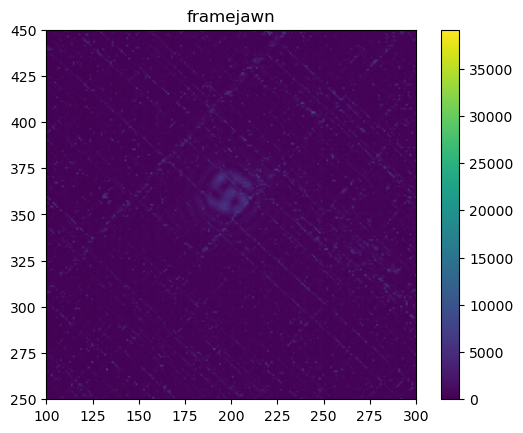

In [15]:
# take a frame and plot...just to see that we still have the beam looking go

#take image
im = cam.take_median_image(10)

#plot image
plt.figure(0)
plt.imshow(im, vmin = 0)
plt.colorbar()
plt.title('framejawn')
plt.xlim(100,300)
plt.ylim(250,450)



(100.0, 300.0)

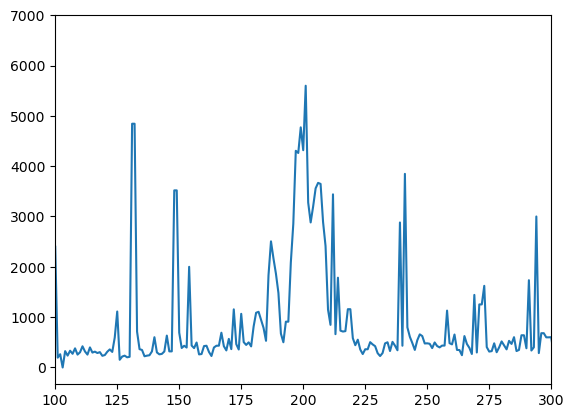

In [16]:
plt.plot(im[360])
plt.xlim(100,300)

Current camera tint: 3.001043ms


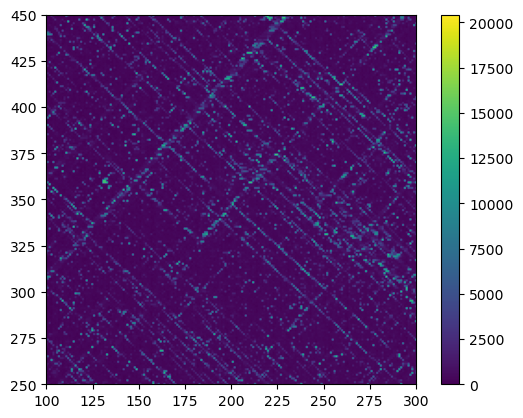

In [385]:
# running data collection

# parameters
sdk.FliCredTwo.EnableBadPixel(cam.context, True)
cam.fps  = 15
cam.tint = 3#1

# take frame
image = cam.take_median_image(10)
plt.imshow(image,vmin=0)
# print(cam.tint)
plt.xlim(100,300)
plt.ylim(250,450)
# plt.axhline(361)
plt.colorbar()
plt.show()
# save 
wv = '1780'
type = 'dark'#'dark'#'nocoro'
expt = '3ms'
np.savetxt("C:\\Users\\Brewster\\Desktop\\MCT_data_071025\\wv_"+wv+"nm_"+type+"_expt_"+expt+".txt",image)


(100.0, 300.0)

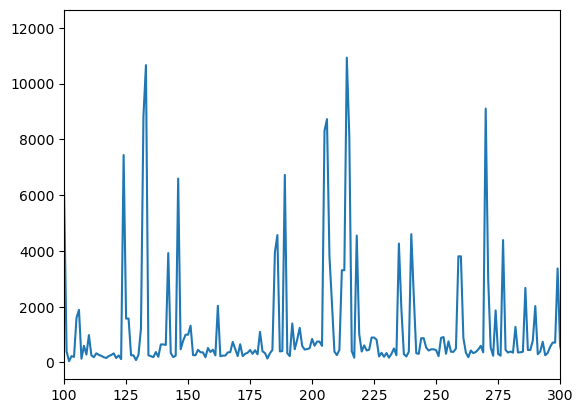

In [386]:
plt.plot(image[361])
plt.xlim(100,300)

In [387]:
imagec = np.loadtxt("C:\\Users\\Brewster\\Desktop\\MCT_data_071025\\wv_"+wv+"nm_nocoro_expt_"+expt+".txt")
imaged = np.loadtxt("C:\\Users\\Brewster\\Desktop\\MCT_data_071025\\wv_"+wv+"nm_dark_expt_"+expt+".txt")



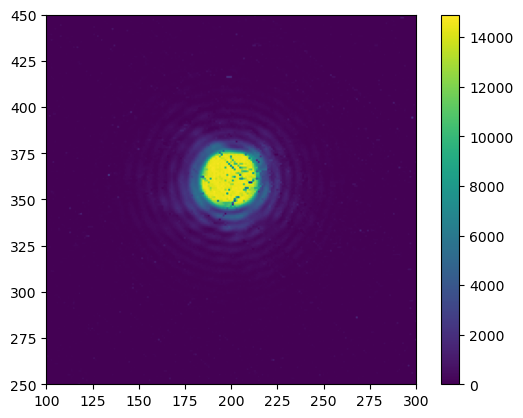

In [388]:
plt.imshow(imagec-imaged,vmin=0)

plt.xlim(100,300)
plt.ylim(250,450)
plt.colorbar()
plt.show()

(100.0, 300.0)

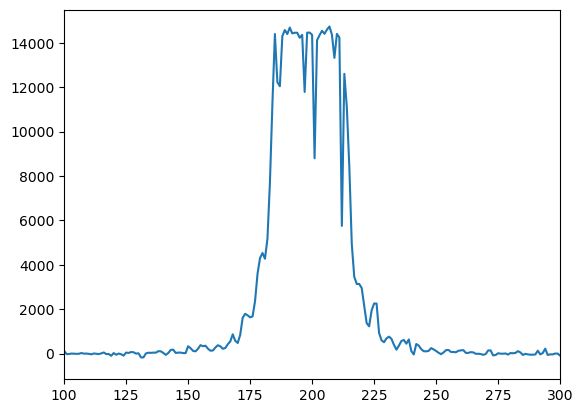

In [389]:
plt.plot((imagec-imaged)[360])
plt.xlim(100,300)